## Credit Card Approval Analysis

## Introduction

Credit card approval is a critical process in the financial sector.
 
The objectives are:
- To understand the key features influencing approval decisions
- To perform data preprocessing and exploratory data analysis
- To build predictive models for automated approval decisions

### Objectives:
1. **Data Exploration**: Gain insights into the dataset
2. **Feature Engineering**: Handle missing values, categorical encoding, and scaling
3. **Model Building**: Use machine learning models to predict credit card approvals
4. **Evaluation**: Assess model performance using appropriate metrics

##  Import Libraries

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
# Load dataset
App_record = pd.read_csv('/kaggle/input/a-credit-card-dataset-for-machine-exam/application_record.csv')
credit_data = pd.read_csv('/kaggle/input/a-credit-card-dataset-for-machine-exam/credit_record.csv')
print("shape of application_record:",App_record.shape)
print("Shape of credit_record:",credit_data.shape)

shape of application_record: (438557, 18)
Shape of credit_record: (1048575, 3)


In [3]:
#Display first 5 raw data 
App_record.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## Dataset Overview

In [4]:
#Discribe numerical data
App_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [5]:
#Display dataset information 
App_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

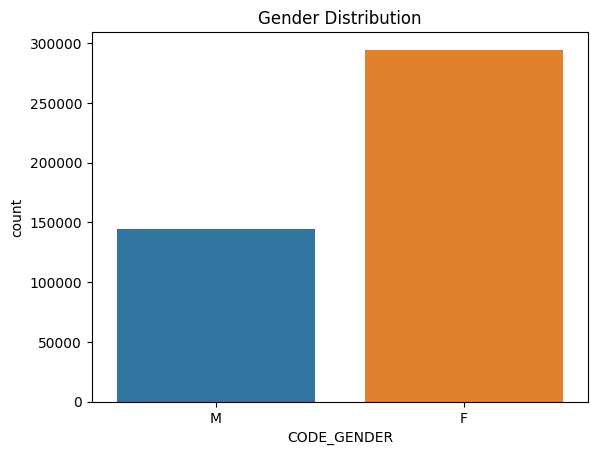

In [6]:
# Draw the count plot (Male and Female)
sns.countplot(data=App_record, x='CODE_GENDER')
plt.title('Gender Distribution')
plt.show()


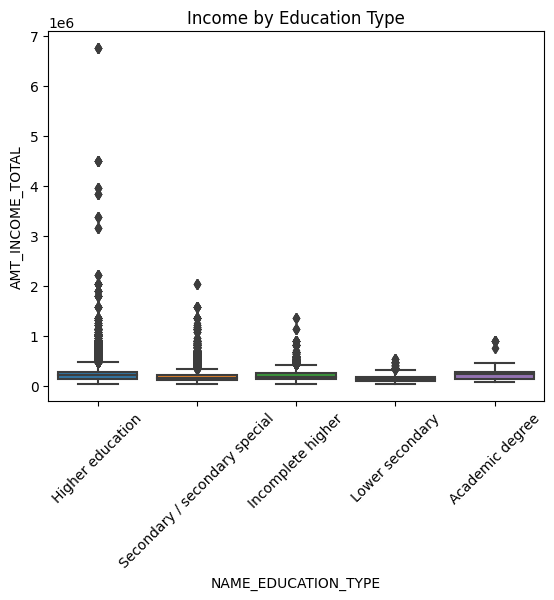

In [7]:
# Boxplot of income by education type
sns.boxplot(data=App_record, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL')
plt.title('Income by Education Type')
plt.xticks(rotation=45)
plt.show()

In [8]:
#Calculate null values
App_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

## Data Preprocessing and Cleaning
**Before performing any analysis or building models, it's essential to clean and preprocess the data. This includes handling missing values and encoding categorical variables.**

In [9]:
# FLAG_MOBIL have a single value (1) and provide no variance
App_record.drop('FLAG_MOBIL', axis=1, inplace=True)

In [10]:
# Remove Duplicates in data 
App_record = App_record.loc[~App_record.drop(columns=["ID"]).duplicated()]

print("shape of application_record:",App_record.shape)

shape of application_record: (90085, 17)


In [11]:
#Get numerical columns to draw anomaly values
numeric_columns = App_record.select_dtypes(include=['int64', 'float64'])
numeric_columns = numeric_columns.drop(columns=["ID","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL"])
numeric_columns.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'CNT_FAM_MEMBERS'],
      dtype='object')

In [12]:
# Binary Encoding for Categorical Variables
App_record["CODE_GENDER"] = App_record["CODE_GENDER"].map({"M":1,"F":0})
App_record["FLAG_OWN_CAR"] = App_record["FLAG_OWN_CAR"].map({"Y":1,"N":0})
App_record["FLAG_OWN_REALTY"] = App_record["FLAG_OWN_REALTY"].map({"Y":1,"N":0})

In [13]:
# Dropping Unnecessary Columns
App_record = App_record.drop(columns=["OCCUPATION_TYPE"])
App_record.shape

(90085, 16)

In [14]:
# convert Days_birth and Days_Emp to possitive value and calculate Age and years_Emp then drop invalid value
App_record["DAYS_BIRTH"] = (-App_record["DAYS_BIRTH"])/365
App_record["DAYS_EMPLOYED"] = np.where(App_record["DAYS_EMPLOYED"]>0,0,(-App_record["DAYS_EMPLOYED"])/365)
# Drop anomaly values 
App_record = App_record[App_record["DAYS_EMPLOYED"] != 0]
print(App_record.shape)
App_record.head(5)

(74398, 16)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,0,1,1,1.0
10,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,2.0
13,5008819,1,1,1,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.706849,3.271233,0,0,0,2.0


In [15]:
# one-Hot encoding for categorical columns
App_record = pd.get_dummies(App_record,columns=["NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE"])
App_record = App_record.astype(int)

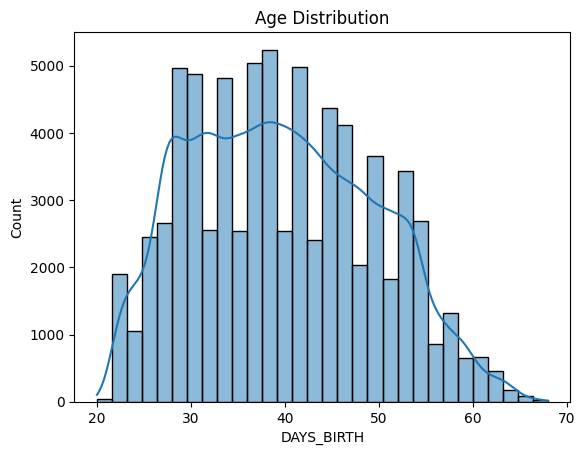

In [16]:
# Plot the age distribution 
sns.histplot(data=App_record, x='DAYS_BIRTH', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

### preprocessing to credit data

In [17]:
# Transform to possitive value and dropping column
credit_data["Months_ago"] = credit_data["MONTHS_BALANCE"].apply(lambda x: abs(x))
credit_data = credit_data.drop(columns=["MONTHS_BALANCE"])
credit_data.head()

,ID,STATUS,Months_ago
0,5001711,X,0
1,5001711,0,1
2,5001711,0,2
3,5001711,0,3
4,5001712,C,0


In [18]:
credit_data["STATUS"].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [19]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ID          1048575 non-null  int64 
 1   STATUS      1048575 non-null  object
 2   Months_ago  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [20]:
#Group C, 0, and X into Category 1 ("Non-overdue") and group 1, 2, 3, 4, and 5 into Category 0 ("Overdue").
credit_data['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
credit_data['STATUS'] = credit_data['STATUS'].astype('int')
credit_data['STATUS'] = credit_data['STATUS'].apply(lambda x:1 if x >= 1 else 0)

In [21]:
credit_data['STATUS'].value_counts()

STATUS
0    1034381
1      14194
Name: count, dtype: int64

In [22]:
# Grouping and aggregaration to data
credit_data = credit_data.groupby('ID').agg(max).reset_index()
credit_data = credit_data.drop(columns=["Months_ago"])
credit_data.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [23]:
credit_data["STATUS"].value_counts()

STATUS
0    40635
1     5350
Name: count, dtype: int64

In [24]:
# Merge data on ID
data = pd.merge(App_record, credit_data, on='ID')

X = data.drop(columns=['STATUS'])
y = data['STATUS']

print("credit_data",credit_data.shape)
print("App_record",App_record.shape)
print("data",data.shape)

credit_data (45985, 2)
App_record (74398, 33)
data (8013, 34)


### Visualization for Anomaly Detection

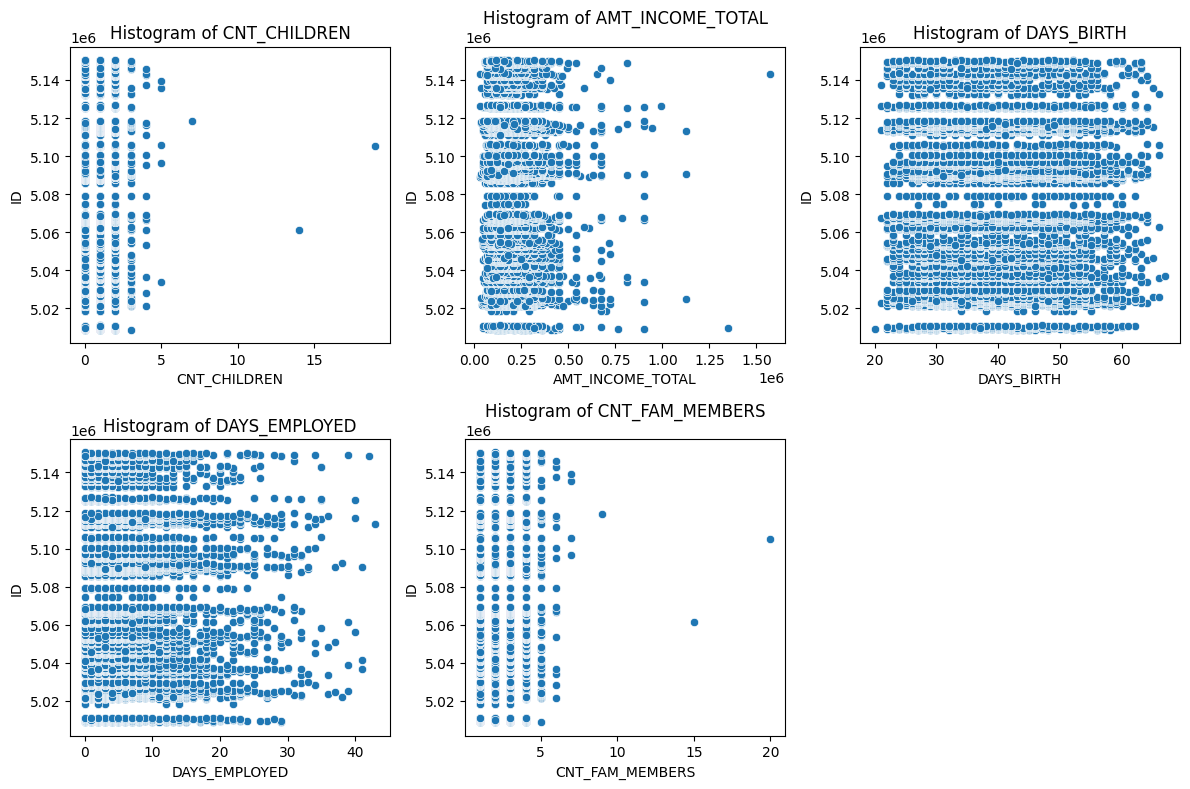

In [25]:
#To detect anomaly data
plt.figure(figsize=(12,8))
for i in range(numeric_columns.columns.shape[0]):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=X[numeric_columns.columns[i]],y=X["ID"])
    plt.title(f"Histogram of {numeric_columns.columns[i]}")
plt.tight_layout()
plt.show()

In [26]:
#Delete Anomaly data
App_record = App_record.drop(App_record[(App_record["CNT_CHILDREN"]>10)].index)
App_record = App_record.drop(App_record[(App_record["AMT_INCOME_TOTAL"]>1000000)].index)
App_record = App_record.drop(App_record[(App_record["CNT_FAM_MEMBERS"]>10)].index)

In [27]:
#Update data
data = pd.merge(App_record, credit_data, on='ID',how='inner')
X = data.drop(columns=['STATUS'])
y = data['STATUS']

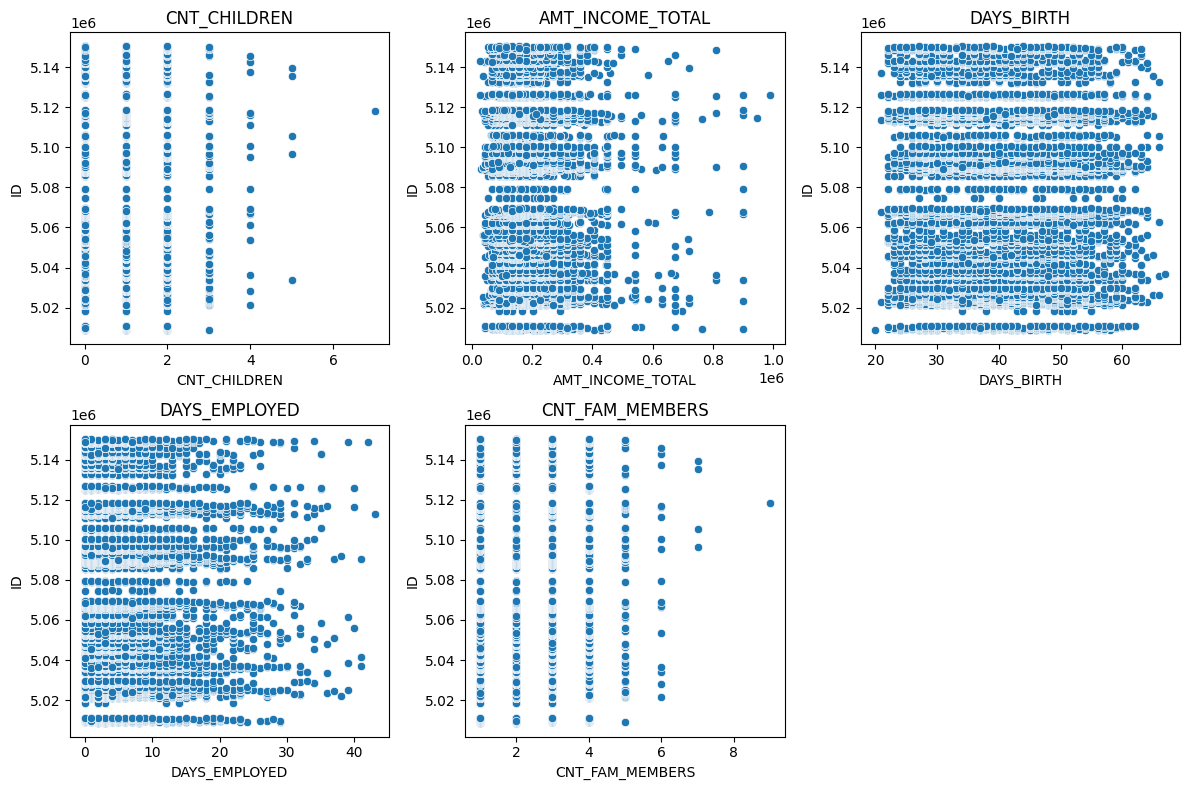

In [28]:
#To ensure  clear data visualization
plt.figure(figsize=(12,8))
for i in range(numeric_columns.columns.shape[0]):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=X[numeric_columns.columns[i]],y=X["ID"])
    plt.title(numeric_columns.columns[i])
plt.tight_layout()
plt.show()

In [29]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,STATUS
0,5008804,1,1,1,0,427500,32,12,1,0,...,0,0,0,0,0,0,0,1,0,1
1,5008806,1,1,1,0,112500,58,3,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5008808,0,0,1,0,270000,52,8,0,1,...,0,1,0,0,1,0,0,0,0,0
3,5008815,1,1,1,0,270000,46,2,1,1,...,0,0,0,0,1,0,0,0,0,0
4,5008819,1,1,1,0,135000,48,3,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
data["STATUS"].value_counts()

STATUS
0    6919
1    1087
Name: count, dtype: int64

In [31]:
#Normalizing data with Min-Max Scaling
scale =MinMaxScaler()
X = scale.fit_transform(X)

## Splitting Data into Training and Test Sets

In [32]:
#Splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (6404, 33)
X_test: (1602, 33)
y_train: (6404,)
y_test: (1602,)


In [33]:
# Balancing the dataset using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)

##  Model Selection

In [34]:
# Applying Multiple Models for Model Selection
LRModel = LogisticRegression()
SVMModel = SVC(kernel='poly',degree=3)
KNNModel = KNeighborsClassifier(n_neighbors=7)
DTModel = DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=42)
RFModel = RandomForestClassifier(n_estimators=50, random_state=42,criterion="entropy",max_depth=5)
ABModel = AdaBoostClassifier()
GBCModel = GradientBoostingClassifier()
XGBModel = XGBClassifier()
models = [LRModel,SVMModel,KNNModel,DTModel,RFModel,ABModel,GBCModel,XGBModel]

In [35]:
# Train and evaluate each model
for model in models:
  print(f"for {str(model).split('(')[0]} Model")
  model.fit(X_balanced, y_balanced)
  y_pred = model.predict(X_test_balanced)
  score_train = model.score(X_balanced, y_balanced)
  score_test = model.score(X_test_balanced, y_test_balanced)
  CR = classification_report(y_test_balanced, y_pred)
  print(f"The score for train model:{score_train}")
  print(f"The score for test model: {score_test}")
  Accuracy = accuracy_score(y_test_balanced, y_pred)
  CM = confusion_matrix(y_test_balanced, y_pred)
  print(f"Accuracy score is:        {Accuracy}\nClassification Reprot:\n      {CR}\nConfusion_matrix:\n {CM}")
  print("----------------------------------------------------------")
    

for LogisticRegression Model
The score for train model:0.5563291139240506
The score for test model: 0.5403167746580274
Accuracy score is:        0.5403167746580274
Classification Reprot:
                    precision    recall  f1-score   support

           0       0.54      0.52      0.53      1389
           1       0.54      0.56      0.55      1389

    accuracy                           0.54      2778
   macro avg       0.54      0.54      0.54      2778
weighted avg       0.54      0.54      0.54      2778

Confusion_matrix:
 [[723 666]
 [611 778]]
----------------------------------------------------------
for SVC Model
The score for train model:0.733996383363472
The score for test model: 0.6141108711303096
Accuracy score is:        0.6141108711303096
Classification Reprot:
                    precision    recall  f1-score   support

           0       0.62      0.58      0.60      1389
           1       0.61      0.65      0.63      1389

    accuracy                          

## Conclusion and Model Evaluation Summary

#### Based on the evaluation, the XGBoost Classifier performed the best with an accuracy of 90.34%, followed closely by the Gradient Boosting Classifier with an accuracy of 88.56%. Both models demonstrated strong precision, recall, and F1-scores, making them the most suitable for deployment in this scenario.